# Telecom Churn Analysis

## SETUP

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [7]:
from sklearn.metrics import accuracy_score,precision_score,classification_report,confusion_matrix,roc_auc_score,roc_curve,auc

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay

In [9]:
from imblearn.over_sampling import SMOTE

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
import joblib

## DATA LOADING AND PREPROCESSING

We start by loading the dataset to explore its structure and contents. Below is a preview of the dataset to understand its columns, data types, and potential missing values.

In [14]:
data = pd.read_csv("Downloads/telecom_churn.csv")
df = pd.DataFrame(data)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Exploratory Data Analysis (EDA)

EDA helps us understand the dataset through visualizations and statistical summaries. Key objectives include:
- Identifying data distributions and outliers.
- Analyzing relationships between features.
- Exploring class distributions to check for imbalance.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [18]:
df.shape

(3333, 20)

In [19]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [20]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [21]:
df.isnull().sum().sum()

0

In [22]:
df.duplicated().sum()

0

In [23]:
churn =  df['Churn'].value_counts()
churn

Churn
False    2850
True      483
Name: count, dtype: int64

### OUTLIER DETECTION AND HANDLING

In [25]:
num_col = df.select_dtypes(include = ['int64','float64'])
num_col

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,184,510,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


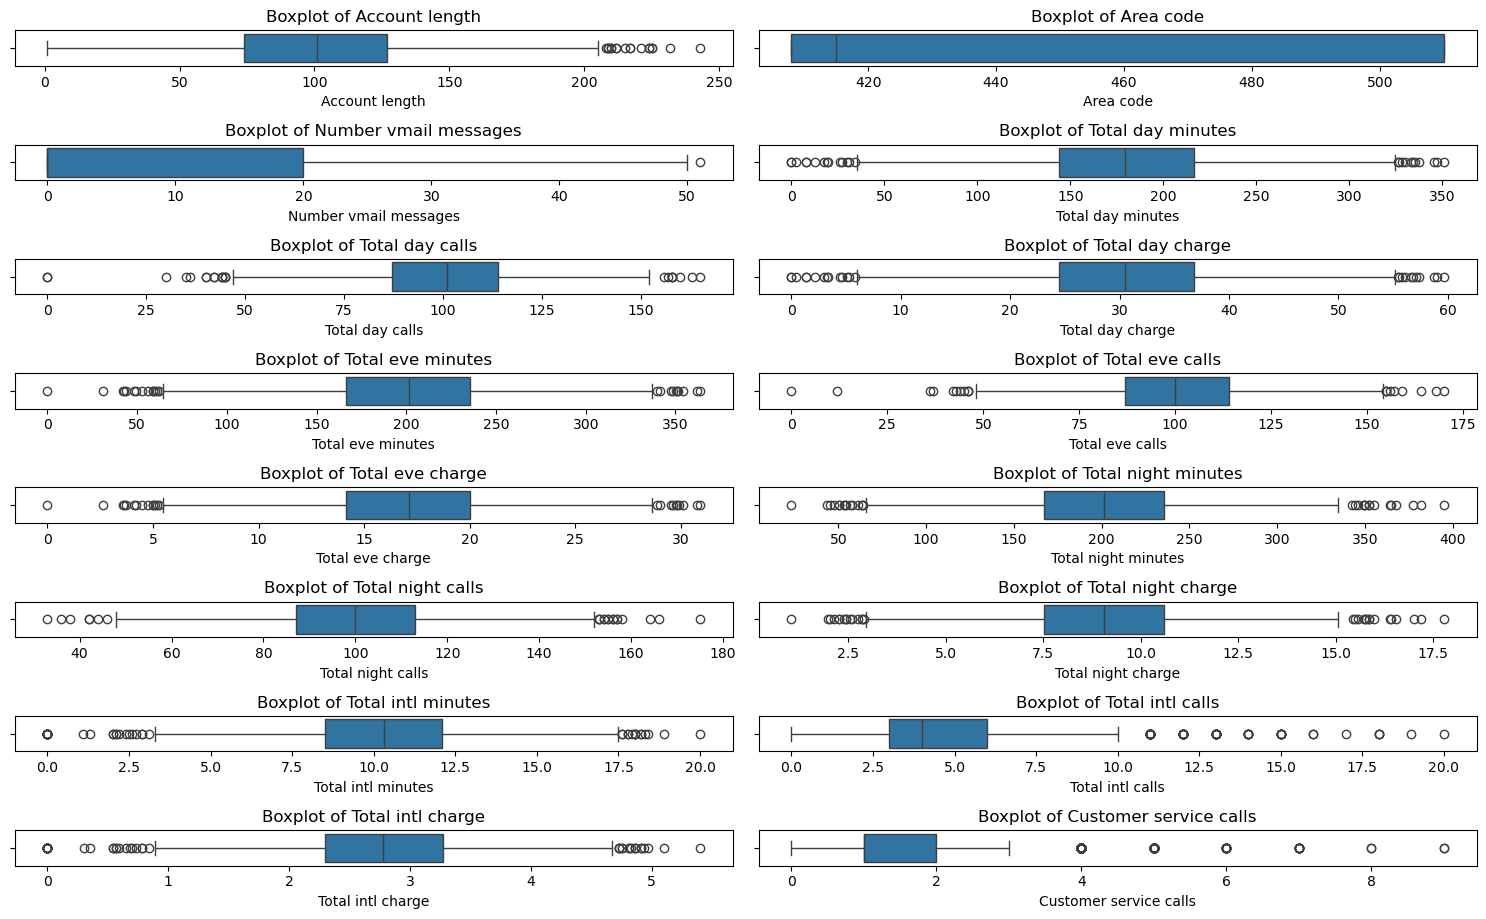

In [26]:
numeric_columns = num_col.columns  
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns):
    plt.subplot((len(numeric_columns) + 2) // 2, 2, i + 1)  
    sns.boxplot(x=df[col])  
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [27]:
def outlier_handler(df):
    for col in df.select_dtypes(include=['int64','float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        df[col] = df[col].apply(lambda x: lower_bound if x<lower_bound else upper_bound if x>upper_bound else x) 
    return df

df1 = outlier_handler(df)

In [28]:
df1.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128.0,415,No,Yes,25.0,265.1,110.0,45.07,197.40,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0,False
1,OH,107.0,415,No,Yes,26.0,161.6,123.0,27.47,195.50,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,False
2,NJ,137.0,415,No,No,0.0,243.4,114.0,41.38,121.20,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,False
3,OH,84.0,408,Yes,No,0.0,299.4,71.0,50.90,63.55,88.0,5.40,196.9,89.0,8.86,6.6,7.0,1.78,2.0,False
4,OK,75.0,415,Yes,No,0.0,166.7,113.0,28.34,148.30,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,False


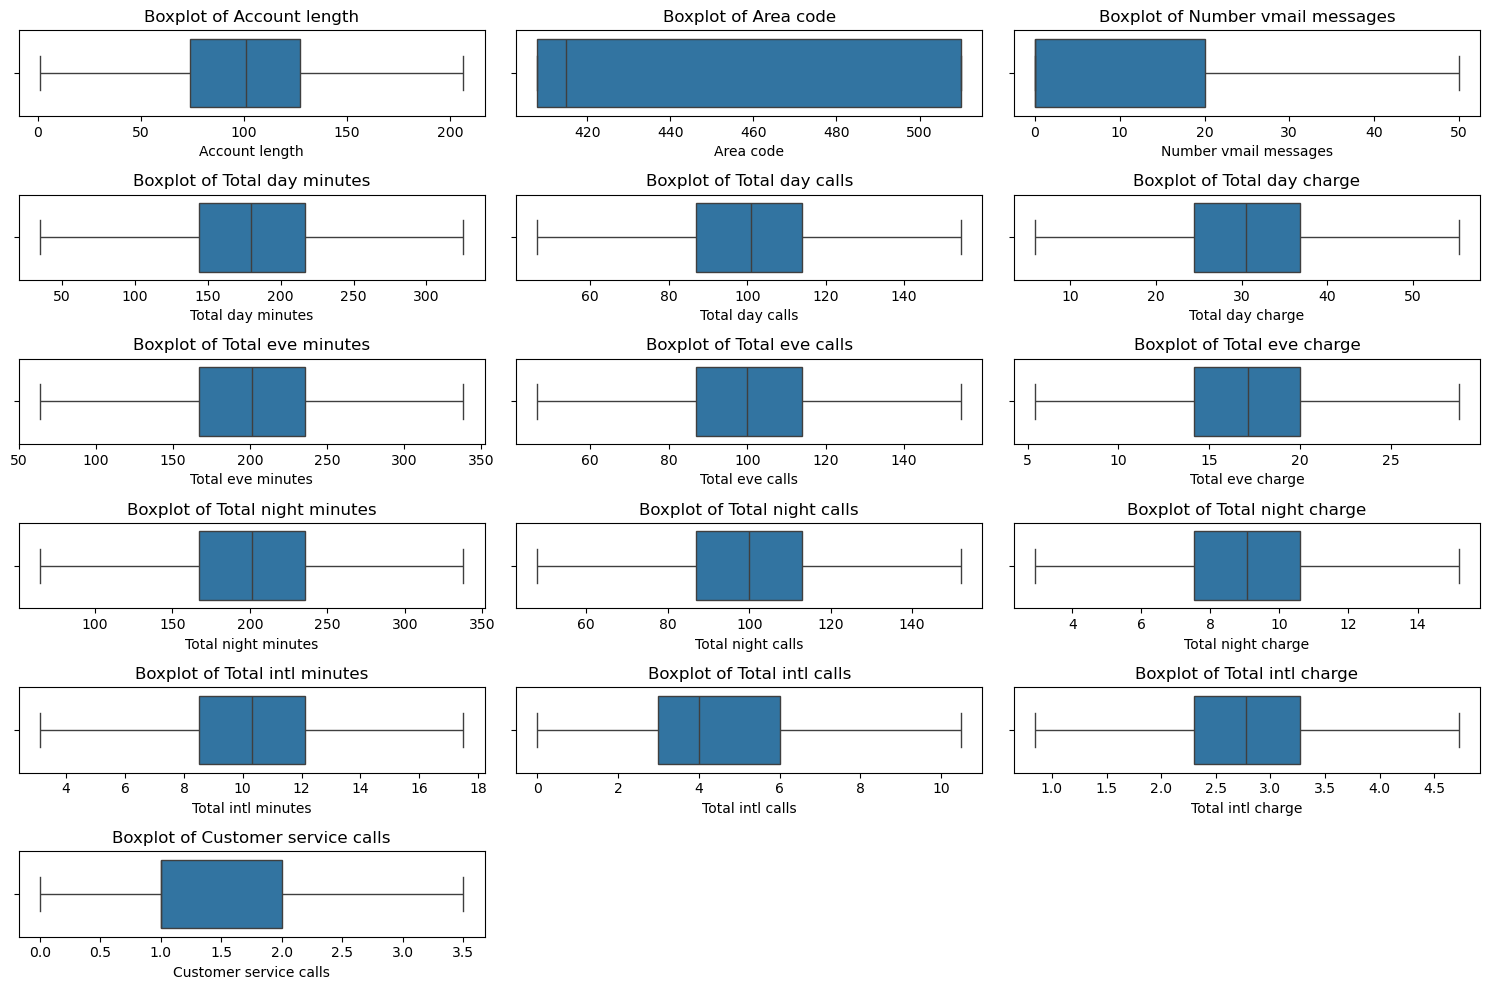

In [29]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns):
    plt.subplot((len(numeric_columns) + 2) // 3, 3, i + 1)  
    sns.boxplot(x=df1[col])  
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

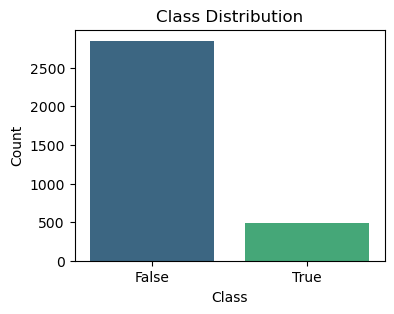

In [30]:
plt.figure(figsize=(4, 3))
sns.countplot(data=df1, x='Churn',hue = 'Churn',legend=False, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

## Data Preprocessing

To prepare the dataset for modeling, the following steps are performed:
- Encoding categorical variables.
- Scaling numeric features.
- Splitting the data into training and testing sets.

### DATA ENCODING

In [34]:
le = LabelEncoder()

In [35]:
df1['Churn'] = le.fit_transform(df1['Churn'])
df1.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128.0,415,No,Yes,25.0,265.1,110.0,45.07,197.40,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0,0
1,OH,107.0,415,No,Yes,26.0,161.6,123.0,27.47,195.50,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,0
2,NJ,137.0,415,No,No,0.0,243.4,114.0,41.38,121.20,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,0
3,OH,84.0,408,Yes,No,0.0,299.4,71.0,50.90,63.55,88.0,5.40,196.9,89.0,8.86,6.6,7.0,1.78,2.0,0
4,OK,75.0,415,Yes,No,0.0,166.7,113.0,28.34,148.30,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,0


In [36]:
cat_col = df1.select_dtypes(include = 'object').columns
cat_col

Index(['State', 'International plan', 'Voice mail plan'], dtype='object')

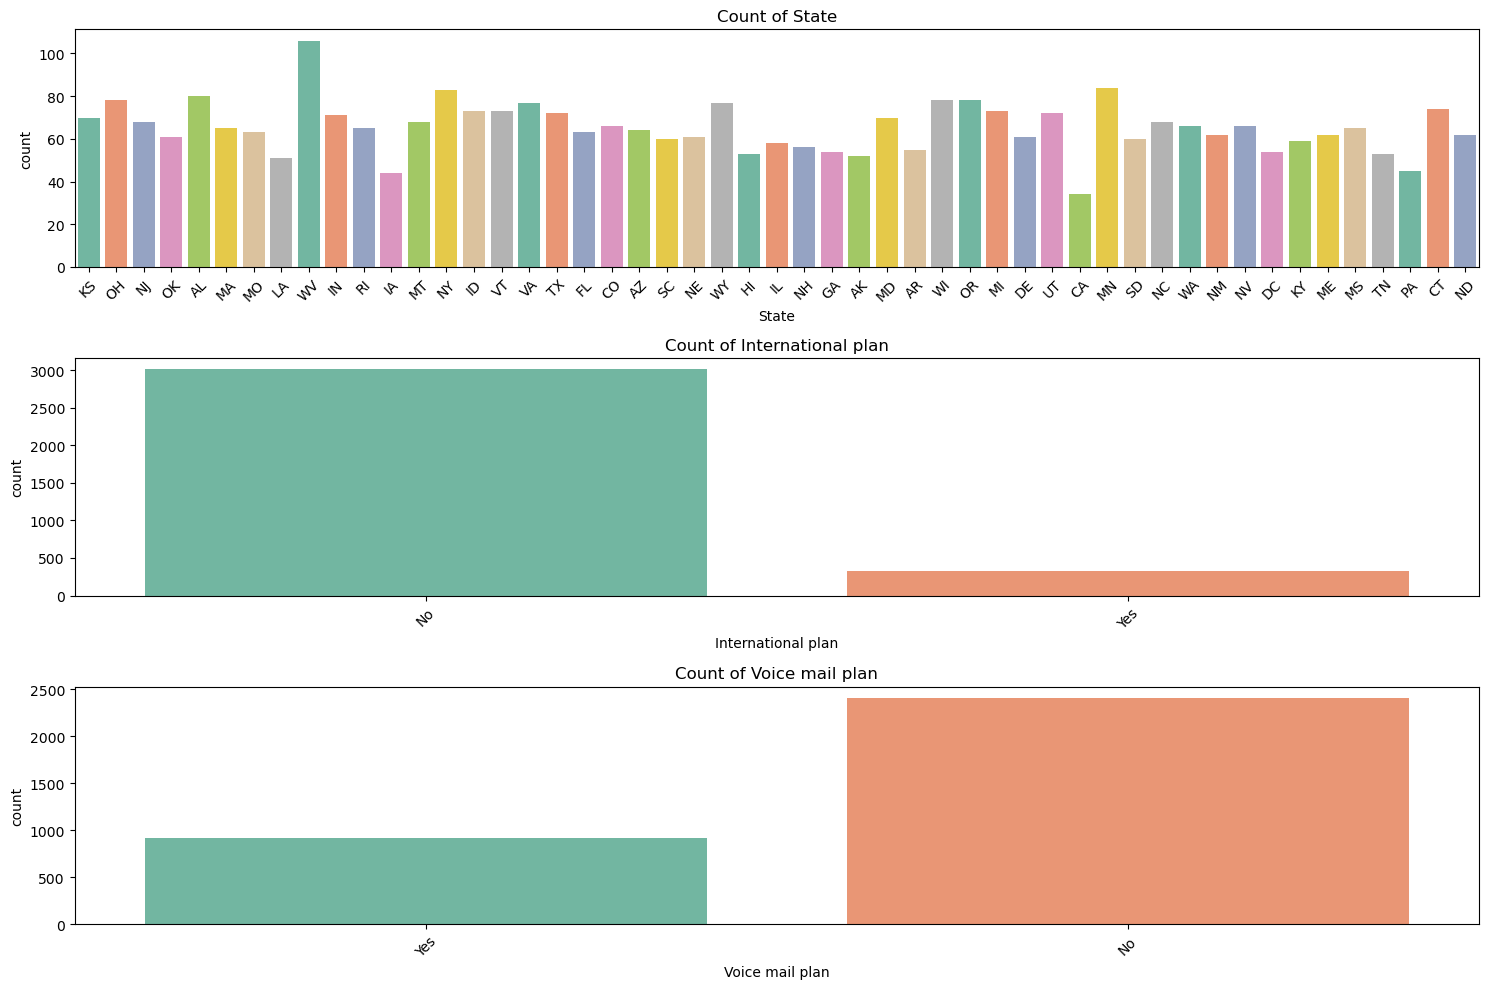

In [37]:
fig, axes = plt.subplots(len(cat_col), 1, figsize=(15, 10))
for i, col in enumerate(cat_col):
    sns.countplot(data=df1, x=col, hue=col, legend=False, palette="Set2", ax=axes[i])
    axes[i].set_title(f"Count of {col}")
    
    # Generate ticks dynamically based on the unique values of the column
    ticks = range(len(df1[col].unique()))
    axes[i].xaxis.set_major_locator(plt.FixedLocator(ticks))
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

In [38]:
df1.drop(columns=['State'], inplace=True)

In [39]:
df1['International plan'] = le.fit_transform(df1['International plan'])
df1['Voice mail plan'] = le.fit_transform(df1['Voice mail plan'])

df1.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128.0,415,0,1,25.0,265.1,110.0,45.07,197.40,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0,0
1,107.0,415,0,1,26.0,161.6,123.0,27.47,195.50,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,0
2,137.0,415,0,0,0.0,243.4,114.0,41.38,121.20,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,0
3,84.0,408,1,0,0.0,299.4,71.0,50.90,63.55,88.0,5.40,196.9,89.0,8.86,6.6,7.0,1.78,2.0,0
4,75.0,415,1,0,0.0,166.7,113.0,28.34,148.30,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,0


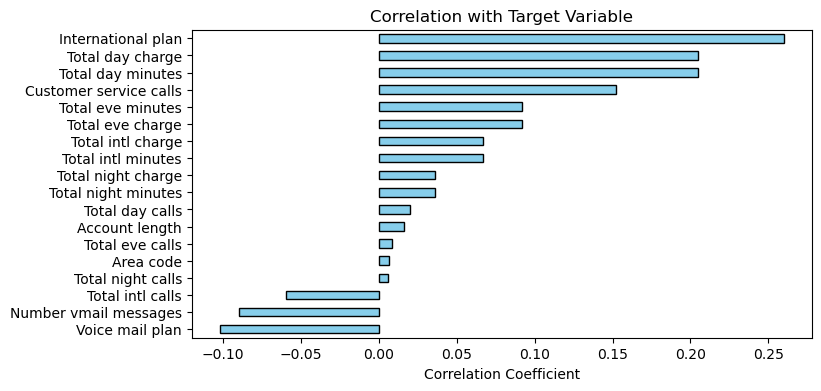

In [40]:
# Correlation of numerical features with target
target_correlation = df1.corr()['Churn'].drop('Churn')
plt.figure(figsize=(8, 4))
target_correlation.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Correlation with Target Variable')
plt.xlabel('Correlation Coefficient')
plt.show()

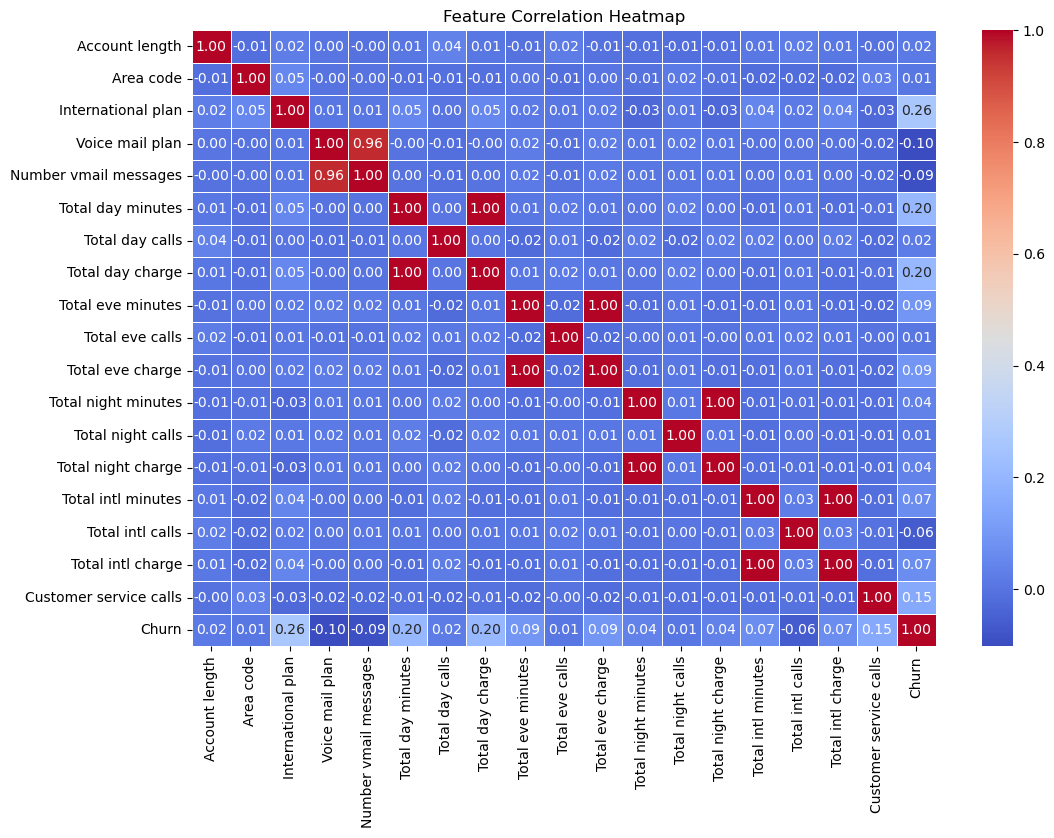

In [41]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation = df1.corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

### FEATURE SELECTION AND SCALING

In [43]:
X = df1.drop(columns = ['Churn'])
y = df1['Churn']

In [44]:
selector = SelectKBest(score_func=f_classif, k=10)  
X_new = selector.fit_transform(X,y)

feature_score = pd.DataFrame({"Features":X.columns,"score":selector.scores_}).sort_values(by = 'score',ascending = False)
feature_score

,Features,score
2,International plan,241.206004
7,Total day charge,145.811745
5,Total day minutes,145.810306
17,Customer service calls,79.209120
3,Voice mail plan,35.122944
8,Total eve minutes,28.501952
10,Total eve charge,28.496653
4,Number vmail messages,27.034131
16,Total intl charge,14.823923
14,Total intl minutes,14.820214


In [45]:
selected_features = X.columns[selector.get_support()]
print("Selected Features:",selected_features)

Selected Features: Index(['International plan', 'Voice mail plan', 'Number vmail messages',
       'Total day minutes', 'Total day charge', 'Total eve minutes',
       'Total eve charge', 'Total intl minutes', 'Total intl charge',
       'Customer service calls'],
      dtype='object')


In [46]:
X_selected = X[selected_features]

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X_selected,y,test_size=0.2,random_state=42)

In [48]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [50]:
print('The shape of X_train_smote is',X_train_smote.shape)
print('Shape of y_train_smote is ',y_train_smote.shape)

The shape of X_train_smote is (4568, 10)
Shape of y_train_smote is  (4568,)


In [135]:
y_train_smote.value_counts()

Churn
0    2284
1    2284
Name: count, dtype: int64

## Modeling and Evaluation

We trained multiple classification models to evaluate their performance using metrics such as accuracy, precision, recall, and F1-score.


### MODEL IMPLEMENTATION

In [91]:
models = {
    'Logistic Regression':LogisticRegression(),
    'SVC':SVC(),
    'Decision Tree Classifier':DecisionTreeClassifier(),
    'Random Forest Classifier':RandomForestClassifier(),
    'Gradient Boosting Classifier':GradientBoostingClassifier(),
    'GaussianNB':GaussianNB()
}

results = {}

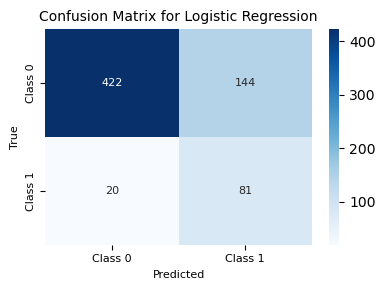

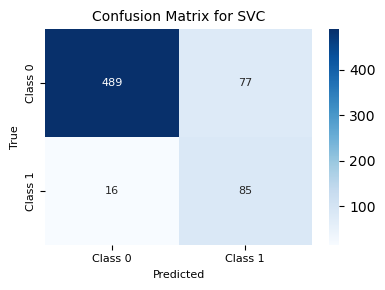

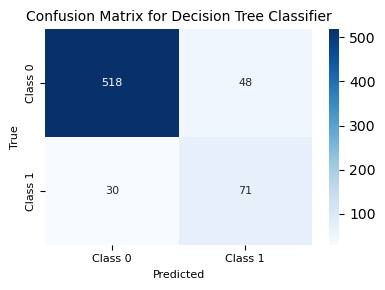

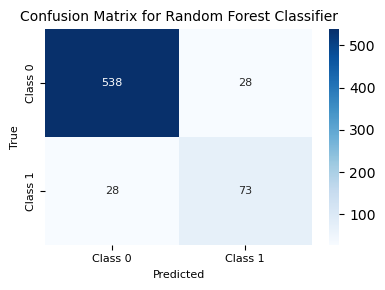

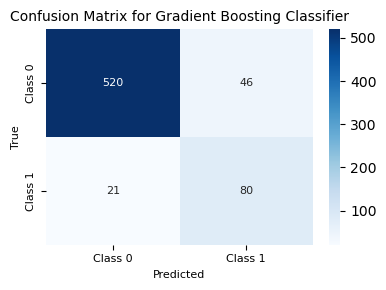

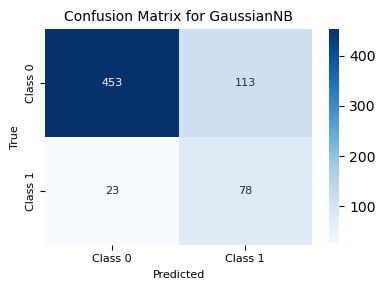

In [93]:
for model_name,model in models.items():
    model.fit(X_train_smote,y_train_smote)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test,y_pred)
    cm = confusion_matrix(y_test,y_pred)
    cr = classification_report(y_test, y_pred)
    results[model_name] = { "Accuracy": acc,"Confusion Matrix": cm, "Classification Report": cr}
    
   # Compact Confusion Matrix Visualization
    plt.figure(figsize=(4, 3))  # Reduced figure size
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"], 
                annot_kws={"size": 8})
    plt.title(f"Confusion Matrix for {model_name}", fontsize=10)  # Smaller title font
    plt.xlabel("Predicted", fontsize=8)
    plt.ylabel("True", fontsize=8)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.tight_layout()  
    plt.show()


In [95]:
print("\n---Summary of Results---")
for model_name, metrics in results.items():
    print(f"\n ---------{model_name}:----------")
    for metric, value in metrics.items():
        if metric == "Confusion Matrix" or metric == "Classification Report":
            print(f"{metric}:\n{value}")
        else:
            print(f"{metric}: {value}")


---Summary of Results---

 ---------Logistic Regression:----------
Accuracy: 0.7541229385307346
Confusion Matrix:
[[422 144]
 [ 20  81]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.75      0.84       566
           1       0.36      0.80      0.50       101

    accuracy                           0.75       667
   macro avg       0.66      0.77      0.67       667
weighted avg       0.86      0.75      0.79       667


 ---------SVC:----------
Accuracy: 0.8605697151424287
Confusion Matrix:
[[489  77]
 [ 16  85]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       566
           1       0.52      0.84      0.65       101

    accuracy                           0.86       667
   macro avg       0.75      0.85      0.78       667
weighted avg       0.90      0.86      0.87       667


 ---------Decision Tree Classifier:----------
Accuracy: 0.8830584

In [97]:
best_model = RandomForestClassifier(random_state=42,max_depth =5 )
best_model.fit(X_train_smote,y_train_smote)

RandomForestClassifier(max_depth=5, random_state=42)

In [99]:
y_test_pred = best_model.predict(X_test_scaled)

In [103]:
test_accuracy = accuracy_score(y_test,y_test_pred)
test_accuracy

0.8785607196401799

In [105]:
classifier = RandomForestClassifier(
    random_state=42,
    n_estimators=50,         
    max_depth=10)

In [107]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

In [109]:
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=10, n_estimators=50,
                                              random_state=42),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [111]:
best_model = grid_search.best_estimator_
print("Best Model:", best_model)

Best Model: RandomForestClassifier(n_estimators=300, random_state=42)


In [113]:
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Best score: 0.936299165230646


#### Overall Performance:

- Best Performer: Random Forest Classifier (around 92%) and Gradient Boosting Classifier demonstrated the highest accuracy (around 90%).
- Strong Performers: Decision Tree Classifier also exhibited strong performance with an accuracy of 89%.
- Moderate Performers: Logistic Regression, SVC, and GaussianNB showed moderate accuracy levels (around 75-88%).

#### Key Observations:

- Class Imbalance: The dataset appears to have class imbalance, with class 0 having significantly more instances than class 1. This is evident in the support values in the classification reports.
- Precision vs. Recall:
- Class 0: Most models exhibit high precision and recall for class 0, indicating good performance in correctly identifying true negatives.
- Class 1: The performance for class 1 varies significantly across models. Some models (SVC, Random Forest, Gradient Boosting) show better precision and recall for class 1 compared to others.

#### Model-Specific Insights:

- Logistic Regression: Simple yet effective, achieving good overall accuracy but with lower recall for class 1.
- SVC: High accuracy and good precision/recall for both classes, suggesting strong generalization ability.
- Decision Tree Classifier: Moderate performance across all metrics.
- Random Forest Classifier: Excellent accuracy and good performance across precision, recall, and F1-score for both classes.
- Gradient Boosting Classifier: Similar performance to Random Forest, achieving high accuracy and balanced performance across metrics.
- GaussianNB: Moderate accuracy with a relatively lower recall for class 1.

## Machine Learning Pipelines  

A machine learning pipeline automates the workflow from data preprocessing to model training and evaluation. This ensures consistency, reduces manual errors, and allows for seamless reproducibility.  


### Key Steps in the Pipeline:

1. **Preprocessing**: Handles encoding, scaling, and missing value imputation.  
2. **Feature Selection**: Selects important features for modeling.  
3. **Model Training**: Fits the chosen model on preprocessed data.  
4. **Evaluation**: Automatically evaluates the model using cross-validation or test sets.  

In [115]:
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('model', best_model)
])

In [125]:
pipeline.fit(X_train_smote,y_train_smote)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(n_estimators=300, random_state=42))])

In [127]:
y_pred_pipeline = pipeline.predict(X_test_scaled)

In [131]:
print(classification_report(y_test, y_pred_pipeline))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       566
           1       0.72      0.73      0.73       101

    accuracy                           0.92       667
   macro avg       0.84      0.84      0.84       667
weighted avg       0.92      0.92      0.92       667



In [133]:
print("Accuracy:", accuracy_score(y_test, y_pred_pipeline))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_pipeline))

Accuracy: 0.9160419790104948
AUC-ROC: 0.8407182591050624


In [135]:
print(confusion_matrix(y_test, y_pred_pipeline))

[[537  29]
 [ 27  74]]


In [137]:
joblib.dump(pipeline, "pp_rfc.joblib")

['pp_rfc.joblib']

In [139]:
load_model = joblib.load("pp_rfc.joblib")

In [141]:
unseen_churn = pd.read_csv("Downloads/Unseen_churn.csv")

unseen_churn.head()

,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day charge,Total eve minutes,Total eve charge,Total intl minutes,Total intl charge,Customer service calls
0,No,Yes,25,265.1,45.07,197.4,16.78,10.0,2.70,1
1,No,Yes,26,161.6,27.47,195.5,16.62,13.7,3.70,1
2,No,No,0,243.4,41.38,121.2,10.30,12.2,3.29,0
3,Yes,No,0,299.4,50.90,61.9,5.26,6.6,1.78,2
4,Yes,No,0,166.7,28.34,148.3,12.61,10.1,2.73,3


In [143]:
unseen_churn['International plan'] = le.fit_transform(unseen_churn['International plan'])
unseen_churn['Voice mail plan'] = le.fit_transform(unseen_churn['Voice mail plan'])

unseen_churn.head()

,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day charge,Total eve minutes,Total eve charge,Total intl minutes,Total intl charge,Customer service calls
0,0,1,25,265.1,45.07,197.4,16.78,10.0,2.70,1
1,0,1,26,161.6,27.47,195.5,16.62,13.7,3.70,1
2,0,0,0,243.4,41.38,121.2,10.30,12.2,3.29,0
3,1,0,0,299.4,50.90,61.9,5.26,6.6,1.78,2
4,1,0,0,166.7,28.34,148.3,12.61,10.1,2.73,3


In [147]:
X_unseen_np = unseen_churn.values 
y_unseen_pred = pipeline.predict(X_unseen_np)

In [149]:
y_unseen_pred

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1], dtype=int64)

In [151]:
unseen_churn['Churn_Predictions'] =y_unseen_pred 

In [153]:
unseen_churn.to_csv('unseen_predictions.csv', index=False)

In [155]:
unseen_churn.head()

,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day charge,Total eve minutes,Total eve charge,Total intl minutes,Total intl charge,Customer service calls,Churn_Predictions
0,0,1,25,265.1,45.07,197.4,16.78,10.0,2.70,1,0
1,0,1,26,161.6,27.47,195.5,16.62,13.7,3.70,1,0
2,0,0,0,243.4,41.38,121.2,10.30,12.2,3.29,0,1
3,1,0,0,299.4,50.90,61.9,5.26,6.6,1.78,2,1
4,1,0,0,166.7,28.34,148.3,12.61,10.1,2.73,3,1


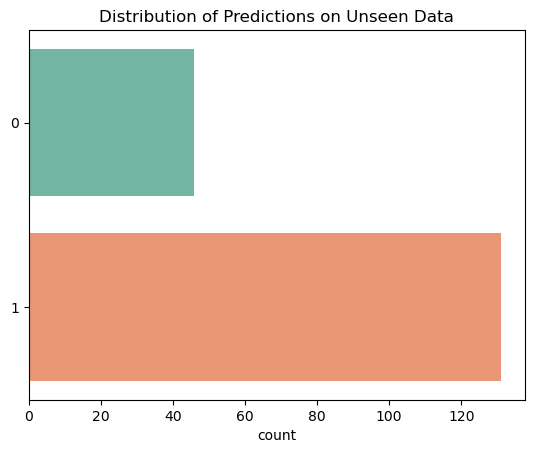

In [157]:
sns.countplot(y=y_unseen_pred,hue = y_unseen_pred,legend=False, palette="Set2")
plt.title("Distribution of Predictions on Unseen Data")
plt.show()

In [161]:
feature_importances = pipeline.named_steps['model'].feature_importances_
feature_names = X_train.columns
sorted_idx = np.argsort(feature_importances)[::-1]

for idx in sorted_idx:
    print(f"{feature_names[idx]}: {feature_importances[idx]:.4f}")


Customer service calls: 0.2266
Total day charge: 0.1510
Total day minutes: 0.1493
International plan: 0.1133
Total eve minutes: 0.0865
Total eve charge: 0.0849
Total intl minutes: 0.0657
Total intl charge: 0.0652
Number vmail messages: 0.0357
Voice mail plan: 0.0218


### Understanding the Output

- y_unseen_pred: This variable holds the predicted churn labels for your unseen data.
- array([0, 0, 1, 1, ...]): This is a NumPy array containing the predictions.
- 0 likely represents "False"
- 1 likely represents "True"

### Further Steps:

- **Evaluate Model Performance:**
  
-- Compare these predictions with the actual labels for the unseen_churn data to evaluate the model's performance using metrics like accuracy, precision, recall, F1-score, and ROC AUC.
  
- **Analyze Results:**
  
-- Investigate the instances where the model made incorrect predictions to understand the reasons for misclassification.
  
-- Consider using techniques like feature importance analysis to identify the most influential features in the model's predictions.

- **Refine Model (if needed):**
  
-- Based on the evaluation results, you may need to refine your model by:
  
--- Adjusting hyperparameters.

--- Trying different feature engineering techniques.

--- Exploring alternative algorithms.